</div>
<center>
<div class="figure" >
  <img src="https://www.ufpb.br/educacaofinanceira/contents/imagens/brasoes-universidades/ufpa.png/@@images/image.png" width="8%">
</div>
<center/>
</div>



Universidade Federal do Pará\
Campus Universitário de Tucuruí\
Faculdade de Engenharia Elétrica

Orientador: Raphael Teixeira\
Autor: Oséias Farias

---

# <center>Modelagem e Simulação Aeropêndulo<center/>

<center>
<div class="figure" >
  <img src="utils/aeropendulo_1.png"
       width="300"> 
  <p>Figura 1 - Diagrama esquemático do Aeropêndulo.</p>
</div>
<center/>

Usando as leis de Newton e momentos angulares podemos encontrar o modelo matemático que descreve a dinâmica do aeropêndulo, assim, temos a equação $(1)$ que modela o sistema em questão.

$$
\begin{align}
    T &= J\ddot{\theta} + c\dot{\theta} +mgd\sin{(\theta)} \tag{01}\\
\end{align}
$$

Queremos controlar o ângulo do braço do aeropêndulo  a partir da tensão aplicada aos terminais do motor, assim,devemos encontrar uma relação entre a tensão $V$ nos terminais do motor e o empuxo $T$ gerado pela hélice, essa relação é não linear, porém é possível aproximar por uma relação linear, como mostra a expressão $(7)$.

$$
\begin{align}
    T &\approx K_mV \tag{02} \\
    K_mV &= J\ddot{\theta} + c\dot{\theta} +mgd\sin{(\theta)} \tag{03}
\end{align}
$$



<center>
<div class="figure" >
  <img src="utils/diagrama_bloco_aeropendulo_nao_linear.svg"
       width="85%"> 
  <p>Figura 2 - Diagrama de blocos do modelo do Aeropêndulo.</p>
</div>
<center/>



$$
\begin{align}
    \dot{x_2} &= x_1 \tag{04} \\
    \dot{x_1}J &= - x_1c - mgdsen(x_2) + VK_m   \tag{05} \\
    \dot{x_1} &= \dfrac{- x_1c - mgdsen(x_2) + VK_m}{J}   \tag{06}
\end{align}
$$



Onde:

>> + $T$: Empuxo gerado pela hélice;
>> + $J$: Momento de inércia;
>> + $\theta$: posição angular do Aeropêndulo;
>> + $c$: coeficiente de amortecimento viscoso;
>> + $m$: peso do Aeropêndulo;
>> + $d$: a distância entre o centro de massa e o ponto de pivô;
>> + $V$: Tensão de Entrada do Motor CC Série
>> + $K_m$: Relação entre o torque e a tensão 
>> + $x_1$ $e$ $x_2$: Estados do Sistema

### Linearizando o Aeropêndulo

Uma das técnicas de linearização quando se tem sistemas não lineares que a componente não linear é o seno ou cosseno é  considerar o seno ou cosseno sendo o valor do próprio ângulo, isso funciona bem para pequenas variações em torno do ângulo, aplicando essa técnica ao modelo do aeropêndulo, temos a equação $(2)$.

$$
\begin{align}
    K_mV &= J\ddot{\theta} + c\dot{\theta} +mgd\theta \tag{07}\\
\end{align}
$$

Aplicando a transformada de Laplace, temos:

$$
\begin{align}
    K_mV(s) &= s^2J\theta(s) + sc\theta(s) +mgd\theta(s) \tag{08}\\
    K_mV(s) &= (s^2J + sc +mgd)\theta(s) \tag{09}\\
    \frac{\theta(s)}{K_mV(s)} &= \frac{1}{s^2J + sc +mgd} \tag{10}\\
    \frac{\theta(s)}{K_mV(s)} &= \frac{1/J}{s^2 + sc/J +mgd/J} \tag{11}\\
    \frac{\theta(s)}{V(s)} &= \frac{K_m/J}{s^2 + sc/J +mgd/J} \tag{12}
\end{align}
$$



### Sistema no Espaço de Estados

##### Forma Canônica de Controlador

$$
    x_1=\theta \quad x_2=\dot{\theta} \quad x_2 = \dot{x_1}
$$


$$
\begin{bmatrix}
    \dot{x}_1 \\
    \dot{x}_2
\end{bmatrix}=
\begin{bmatrix}
    0             & 1\\
    -\frac{mgd}{J} & -\frac{c}{J}
\end{bmatrix}\cdot 
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}+
\begin{bmatrix}
    0 \\
    \frac{K_m}{J}
\end{bmatrix}\cdot u \tag{13}
$$

$$
Y= \begin{bmatrix}
    1 & 0
\end{bmatrix} \cdot
\begin{bmatrix}
    0 \\
    \frac{K_m}{J}
\end{bmatrix} + 0 \tag{14}
$$

#### Parâmetros para Simulação

Para simulação foi usado os parâmetros do $artigo[1]$.

$$
\begin{array}{|c|c|} \hline
\text { Parâmetros do Aeropêndulo } & \text{Valores}      \\ \hline
K_m     &   0,0296                                        \\ \hline
d       &   0,03m                                         \\ \hline
J       &   0,0106 Kgm^2                                  \\ \hline
m       &   0,36 m                                  \\ \hline
g       &   9,8 m/s^2                                     \\ \hline
c       &   0,0076 Nms/rad                                \\ \hline
\end{array}
$$

### Simulação usando Python

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

plt.style.use("ggplot")

%config InlineBackend.figure_format = "svg"

Parâmetros

In [17]:
K_m = 0.0296
m = 0.36
d = 0.03
J = 0.0106
g = 9.8
c = 0.0076

Matrizes do sistema no espaço de estados

In [18]:
A = np.array([[0, 1],
              [-(m*g*d)/J, -(c/J)]])

B = np.array([[0, K_m/J]]).T

C = np.array([1, 0])

D = 0


### Sistema no Espaço de Estados

In [19]:
sys = ct.ss(A, B, C, D)
print(sys)

<LinearIOSystem>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.          1.        ]
     [-9.98490566 -0.71698113]]

B = [[0.        ]
     [2.79245283]]

C = [[1. 0.]]

D = [[0.]]



Função de Transferência a partir do espaço de estados

In [20]:
Gs = ct.ss2tf(sys)
Gs

TransferFunction(array([2.79245283]), array([1.        , 0.71698113, 9.98490566]))

Informações do sistema em malha aberta

In [21]:
ct.step_info(sys)

{'RiseTime': 0.396481513738416,
 'SettlingTime': 10.308519357198815,
 'SettlingMin': 0.14343794449344063,
 'SettlingMax': 0.47415111647086844,
 'Overshoot': 69.54106137593485,
 'Undershoot': 0,
 'Peak': 0.47415111647086844,
 'PeakTime': 1.0308519357198815,
 'SteadyStateValue': 0.2796674225245654}

In [22]:
ct.damp(sys);

_____Eigenvalue______ Damping___ Frequency_
   -0.3585    +3.139j     0.1135       3.16
   -0.3585    -3.139j     0.1135       3.16


In [23]:
ct.poles(sys)

array([-0.35849057+3.13948884j, -0.35849057-3.13948884j])

In [24]:
ct.zeros(sys)

array([], dtype=float64)

Resposta ao Degrau Unitário

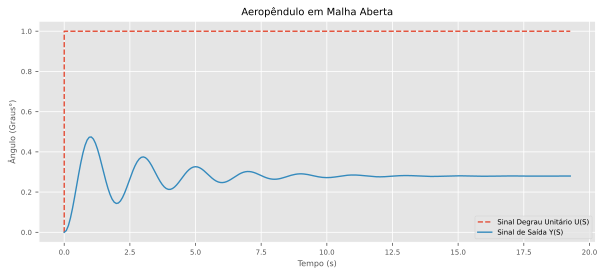

In [34]:
t, yout = ct.step_response(Gs)

plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Aeropêndulo em Malha Aberta", fontsize=10)
ax.set_ylabel("Ângulo (Graus°)", fontsize=8)
ax.set_xlabel("Tempo (s)", fontsize=8)
ax.plot([0, 0, t[-1]], [0, 1, 1], "--", lw=1.4,
        label="Sinal Degrau Unitário U(S)")
ax.plot(t, yout, lw=1.4, label="Sinal de Saída Y(S)")
ax.legend(fontsize=7)
plt.show()

## Controlador projetado usando LGR com auxílio do Matlab

Para fins de teste foi projetado um controlador simples usando o matlab e encontrada a função de transferência com o auxílio da biblioteca Control, por fim foi obteda a equação de diferenças para implementar o controlador no simulador.

<center>
<div class="figure" >
  <img src="utils/sistema_aeropendulo_malha_fechada.svg"
       width="70%"> 
  <p>Figura 3 - Diagrama de blocos do Sistema em Malha Fechada.</p>
</div>
<center/>

<br>


### Função de Transferência do Controlador

$$
\begin{align}
    C(s) &= \frac{0,2126s + 0,7893}{s} \tag{15}
\end{align}
$$

**Função de Transferência do Controlador usando a biblioteca Control do Python**

In [26]:
numc = np.array([0.2126, 0.7893])
denc = np.array([1, 0])

Cs = ct.tf(numc, denc)
Cs

TransferFunction(array([0.2126, 0.7893]), array([1, 0]))

### Simulação do Sistema em Malha Fechada 

In [27]:
Fs = ct.series(Gs, Cs)
Hs = ct.feedback(Fs, 1, sign=-1)
Hs

TransferFunction(array([0.59367547, 2.20408302]), array([ 1.        ,  0.71698113, 10.57858113,  2.20408302]))

In [28]:
ct.step_info(Hs)

{'RiseTime': 10.086501381633674,
 'SettlingTime': 18.388467903439853,
 'SettlingMin': 0.9008661761428961,
 'SettlingMax': 0.9999999999999999,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.9990565919194464,
 'PeakTime': 32.819923726392645,
 'SteadyStateValue': 0.9999999999999999}

### Resposta ao degrau unitário

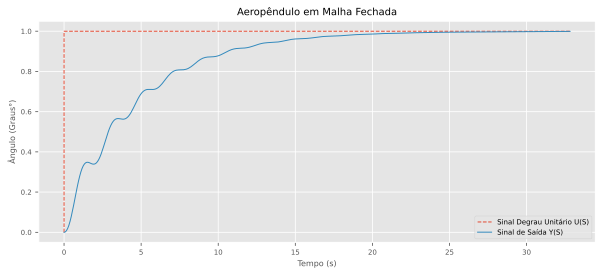

In [31]:
t, yout = ct.step_response(Hs)

plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Aeropêndulo em Malha Fechada", fontsize=10)
ax.set_ylabel("Ângulo (Graus°)", fontsize=8)
ax.set_xlabel("Tempo (s)", fontsize=8)
ax.plot([0, 0, t[-1]], [0, 1, 1], "--", lw=1,
        label="Sinal Degrau Unitário U(S)")
ax.plot(t, yout, lw=1., label="Sinal de Saída Y(S)")
ax.legend(fontsize=7)
plt.show()

Ao analisar o sistema com o controlador, temos que o sistema não possui erro em regime permanente e seu overshoot é zero, no entanto, para que esses requisitos fossem obtidos ouve um aumento no tempo de acomodação.

<br><br>

### Função de Transferência Discreta C(z)

Para discretizar o sistema foi usado um período de amostragem de 0,02s.


In [30]:
from control.matlab import c2d

Cz = c2d(Cs, Ts=0.01, method="tustin")
Cz

TransferFunction(array([ 0.2165465, -0.2086535]), array([ 1., -1.]), 0.01)

$$
\begin{align}
    C(z) &= \dfrac{0,2165z −0,2087}{z-1} \tag{17}\\
         &= \dfrac{0,2165z −0,2087}{z-1} \cdot \dfrac{z^{-1}}{z^{-1}} \tag{18}\\
         &= \dfrac{0,2165 − 0,2087z^{-1}}{1-z^{-1}} \tag{19}\\
\end{align}
$$

#### Encontrando a equação de diferenças do controlador

$$
\begin{align}
    C(z) &= \dfrac{U(z)}{E(z)} \tag{20}
\end{align}
$$

onde:

$$
\begin{align}
    U(z) &=  Z\{u[k]\} \tag{21}\\
    E(z) &=  Z\{e[k]\} \tag{22}
\end{align}
$$


$$
\begin{align}
    \dfrac{U(z)}{E(z)} &= \dfrac{0,2165 − 0,2087z^{-1}}{1-z^{-1}} \tag{23}\\
    (1-z^{-1})U(z) &= (0,2165 − 0,2087z^{-1})E(z) \tag{24}\\
    U(z)-z^{-1}U(z) &= 0,2165E(z) − 0,2087z^{-1}E(z) \tag{25}\\
    Z^{-1}\{U(z)-z^{-1}U(z)\} &= Z^{-1}\{0,2165E(z) − 0,2087z^{-1}E(z)\} \tag{26}\\
    u[k] − u[k − 1] &=  0,2165e[k] − 0,2087e[k − 1] \tag{27}\\
    u[k] &= u[k − 1] + 0,2165e[k] − 0,2087e[k − 1] \tag{28}
\end{align}
$$

<br>

Agora é possível implementar uma classe python para o controlador a partir da equação de diferenças

<br>

$$
\begin{align}
  u[k] &= u[k − 1] + 0,2165e[k] − 0,2087e[k − 1] \tag{29}
\end{align}
$$